## Renewable energy source and EV network data integration

- PV Data: National Renewable Energy Laboratory
- EV Netwoerk: Open Charge Map
   
## Observations for the 7 days analysis:
- Energy production tends to peak around 10am - 11am in the morning
- Over the 7days, '319_PV_1' has consistantly produced the highest energy amount. 
- The Highest PowerKW a charging station has in the EV network is 351KW
## Conlusion:

- Although we are missing demand data from the EV netork to optimize how energy is supplied to each charging location, we can conlcude that the data indicates a strong potential for a sustainable and economically viable integration of the PV site with the EV charging station.
- When Optimized, the EV charging could operate autonomously from the grid, making use of some battery infrastructure for emergency or unforseen situation.

> A. E V Network Data

In [341]:
## Collect the EV network data from Open Charge Map. 

import requests
import pandas as pd
import matplotlib.pyplot as plt

response = requests.get('https://api.openchargemap.io/v3/poi/?output=json&countrycode=US&maxresults=50000&compact=true&verbose=false&key=9b97270d-2fda-4f78-956c-8e98b7914e6c')

In [342]:
## Normalize the JSON data

# First Normalization 
df = pd.json_normalize(response.json())

In [343]:
df.head() # View Sample Data

,IsRecentlyVerified,DateLastVerified,ID,UUID,DataProviderID,OperatorID,UsageTypeID,Connections,NumberOfPoints,GeneralComments,StatusTypeID,DateLastStatusUpdate,DataQualityLevel,DateCreated,SubmissionStatusTypeID,AddressInfo.ID,AddressInfo.Title,AddressInfo.AddressLine1,AddressInfo.Town,AddressInfo.StateOrProvince,AddressInfo.Postcode,AddressInfo.CountryID,AddressInfo.Latitude,AddressInfo.Longitude,AddressInfo.ContactTelephone2,AddressInfo.AccessComments,AddressInfo.DistanceUnit,UsageCost,AddressInfo.ContactTelephone1,AddressInfo.ContactEmail,AddressInfo.RelatedURL,DataProvidersReference,DatePlanned,AddressInfo.AddressLine2,OperatorsReference
0,True,2023-11-09T17:26:00Z,279805,E4CC1FBD-2EF2-48CD-AFE0-4CB3DE8B18BA,1,23.0,4.0,"[{'ID': 486550, 'ConnectionTypeID': 27, 'Statu...",16.0,"16 Superchargers, available 24/7, up to 250kW",50.0,2023-11-09T17:26:00Z,1,2023-11-09T13:44:00Z,200,280192,"Lawrenceville, GA",1150 Scenic Hwy N,Lawrenceville,GA,30045,2,33.903360,-84.002260,8777983752,Located at Snellville Exchange,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,2023-11-09T17:26:00Z,279802,FB26217B-8BFE-4B92-B3EE-5369A34AB476,1,23.0,4.0,"[{'ID': 486547, 'ConnectionTypeID': 27, 'Statu...",12.0,"12 Superchargers, available 24/7, up to 250kW",50.0,2023-11-09T17:26:00Z,1,2023-11-08T22:18:00Z,200,280189,"Dublin, CA - Amador Valley Boulevard",7841 Amador Valley Boulevard,Dublin,CA,94568,2,37.707400,-121.934980,8777983752,Located at Shamrock Village,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,True,2023-11-08T14:59:00Z,279788,14E50590-E253-42A6-8351-F138963F1080,1,5.0,2.0,"[{'ID': 486527, 'ConnectionTypeID': 1, 'Status...",2.0,,50.0,2023-11-08T14:59:00Z,1,2023-11-08T11:52:00Z,200,280175,BMC Employee Garage,5 Waconah St,Pittsfield,MA,01201,2,42.458317,-73.250391,NaN,Available for use by BHS employees ONLY—garage...,0,$0.25/kWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,True,2023-11-08T17:44:00Z,279708,35859A77-ADAF-41F8-BF59-A7BB7886D110,1,9.0,1.0,"[{'ID': 486375, 'ConnectionTypeID': 1, 'Status...",2.0,NaN,50.0,2023-11-08T17:44:00Z,1,2023-11-05T17:42:00Z,200,280095,Dos Cabezas WineWorks,3248 HWY 82,Sonoita,Arizona,85637,2,31.680016,-110.653542,NaN,NaN,0,$0.49/kWh,5204555141,info@doscabezas.com,http://www.DosCabezas.com,NaN,NaN,NaN,NaN
4,True,2023-11-07T03:14:00Z,279624,588BDC1A-0F08-474B-A24F-DB12D7258721,1,23.0,4.0,"[{'ID': 486092, 'ConnectionTypeID': 27, 'Statu...",12.0,"12 Superchargers, available 24/7, up to 250kW",50.0,2023-11-07T03:14:00Z,1,2023-11-04T03:10:00Z,200,280011,"Mishawaka, IN - Grape Road",5020 Grape Rd,Mishawaka,IN,46545,2,41.706720,-86.185680,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
# Second Normalization. Due to the sample information presented  in the df, we need a second normalization. 

connections = [item for sublist in df['Connections'] for item in sublist] # get list of items in the connection column

df2 = pd.DataFrame(connections) #create a df with the connections data

df2['original_index'] = df.index.repeat(df['Connections'].str.len())

df = df.merge(df2, left_index=True, right_on='original_index', how='left') #merfe the new df with the original df

df = df.drop(columns=['Connections', 'original_index']) #Drop repeated columns


In [345]:
df.head(3) #Completely denormalized data

,IsRecentlyVerified,DateLastVerified,ID_x,UUID,DataProviderID,OperatorID,UsageTypeID,NumberOfPoints,GeneralComments,StatusTypeID_x,DateLastStatusUpdate,DataQualityLevel,DateCreated,SubmissionStatusTypeID,AddressInfo.ID,AddressInfo.Title,AddressInfo.AddressLine1,AddressInfo.Town,AddressInfo.StateOrProvince,AddressInfo.Postcode,AddressInfo.CountryID,AddressInfo.Latitude,AddressInfo.Longitude,AddressInfo.ContactTelephone2,AddressInfo.AccessComments,AddressInfo.DistanceUnit,UsageCost,AddressInfo.ContactTelephone1,AddressInfo.ContactEmail,AddressInfo.RelatedURL,DataProvidersReference,DatePlanned,AddressInfo.AddressLine2,OperatorsReference,ID_y,ConnectionTypeID,StatusTypeID_y,LevelID,PowerKW,CurrentTypeID,Quantity,Amps,Voltage,Comments,Reference
0.0,True,2023-11-09T17:26:00Z,279805,E4CC1FBD-2EF2-48CD-AFE0-4CB3DE8B18BA,1,23.0,4.0,16.0,"16 Superchargers, available 24/7, up to 250kW",50.0,2023-11-09T17:26:00Z,1,2023-11-09T13:44:00Z,200,280192,"Lawrenceville, GA",1150 Scenic Hwy N,Lawrenceville,GA,30045,2,33.903360,-84.002260,8777983752,Located at Snellville Exchange,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486550.0,27.0,50.0,3.0,250.0,30.0,16.0,NaN,NaN,NaN,NaN
1.0,True,2023-11-09T17:26:00Z,279802,FB26217B-8BFE-4B92-B3EE-5369A34AB476,1,23.0,4.0,12.0,"12 Superchargers, available 24/7, up to 250kW",50.0,2023-11-09T17:26:00Z,1,2023-11-08T22:18:00Z,200,280189,"Dublin, CA - Amador Valley Boulevard",7841 Amador Valley Boulevard,Dublin,CA,94568,2,37.707400,-121.934980,8777983752,Located at Shamrock Village,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486547.0,27.0,50.0,3.0,250.0,30.0,12.0,NaN,NaN,NaN,NaN
2.0,True,2023-11-08T14:59:00Z,279788,14E50590-E253-42A6-8351-F138963F1080,1,5.0,2.0,2.0,,50.0,2023-11-08T14:59:00Z,1,2023-11-08T11:52:00Z,200,280175,BMC Employee Garage,5 Waconah St,Pittsfield,MA,01201,2,42.458317,-73.250391,NaN,Available for use by BHS employees ONLY—garage...,0,$0.25/kWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486527.0,1.0,50.0,2.0,7.1,10.0,2.0,NaN,NaN,NaN,NaN


In [472]:
%%capture
#Curate the important data for integration with Photovoltaic energy supply data

'''dfX = df[['ID_x', 'OperatorID', 'ID_y', 'Quantity','Voltage','PowerKW', 'Amps' ]] #select the columns

dfX.dropna(inplace=True) #Drop Na value

dfX.set_index(dfX.columns[0], inplace=True) #Set New Index'''

dfX.sort_values(by='ID_x', inplace=True) #Sort data

In [473]:
dfX

,OperatorID,ID_y,Quantity,Voltage,PowerKW,Amps
ID_x,,,,,,
81519,23.0,151195.0,1.0,230.0,7.0,32.0
81753,23.0,116511.0,3.0,230.0,8.0,32.0
81827,23.0,116585.0,4.0,400.0,11.0,16.0
82052,23.0,116812.0,3.0,230.0,13.0,32.0
82151,23.0,116911.0,4.0,400.0,11.0,16.0
...,...,...,...,...,...,...
278371,9.0,481026.0,3.0,230.0,3.7,16.0
278377,9.0,481032.0,1.0,230.0,3.7,16.0
279202,45.0,484126.0,1.0,240.0,9.6,40.0


> B. Photovoltaic Data

* Data Source: 
    - https://github.com/GridMod/RTS-GMLC/blob/8688552bfc2d73ea58a6abcc99fe4d3e0b020f90/RTS_Data/timeseries_data_files/PV/REAL_TIME_pv.csv 

In [403]:
#Read the download csv from github repository.

''' contains the actual available energy generation 
for each utility scale PV plant by 5-minute interval. 
The data is collected for the 365 days in 2020.'''

pv_df = pd.read_csv('REAL_TIME_pv.csv')

In [404]:
# Data Filetering
'''for purpose of this sample project, 
data is filtered to the first 7 days of energy generation of january'''

pv_df_jan = pv_df[(pv_df['Day'] <= 7)& (pv_df['Month']==1)]

In [405]:
%%capture

pv_df_jan['hourly']= pv_df_jan.index // 12

summed_pv = pv_df_jan.groupby('hourly').sum().reset_index(drop=True)

In [406]:
#Change year after changing time granularity level to hourly
summed_pv['Year'] = 2020

#Change Month
summed_pv['Month'] = 1

#Change the days
for i in range(len(summed_pv['Day'])):
    summed_pv.at[i, 'Day'] = ((summed_pv.at[i, 'Day'] - 1) // 12) + 1

In [407]:
#Create a timestamp from the available date information
summed_pv['timestamp'] = pd.to_datetime(summed_pv[['Year', 'Month', 'Day']],format='%Y %m %d %H')

#change timestamp location
summed_pv.iloc[:, :1] = summed_pv['timestamp']

#drop columns not needed
summed_pv.drop(columns=(['Month','Day', 'Period', 'timestamp']), inplace=True)

#Change column name
summed_pv.rename(columns={"Year":"Date"}, inplace=True)

#add an hour column
summed_pv['Period']=[(i % 24) + 1 for i in range(168)]

In [417]:
#Seperate daily data

jan_first = summed_pv[summed_pv['Date']=='2020-01-01']
jan_second = summed_pv[summed_pv['Date']=='2020-01-02']
jan_third = summed_pv[summed_pv['Date']=='2020-01-03']
jan_fourth = summed_pv[summed_pv['Date']=='2020-01-04']
jan_fith = summed_pv[summed_pv['Date']=='2020-01-05']
jan_sixth = summed_pv[summed_pv['Date']=='2020-01-06']
jan_seventh = summed_pv[summed_pv['Date']=='2020-01-07']

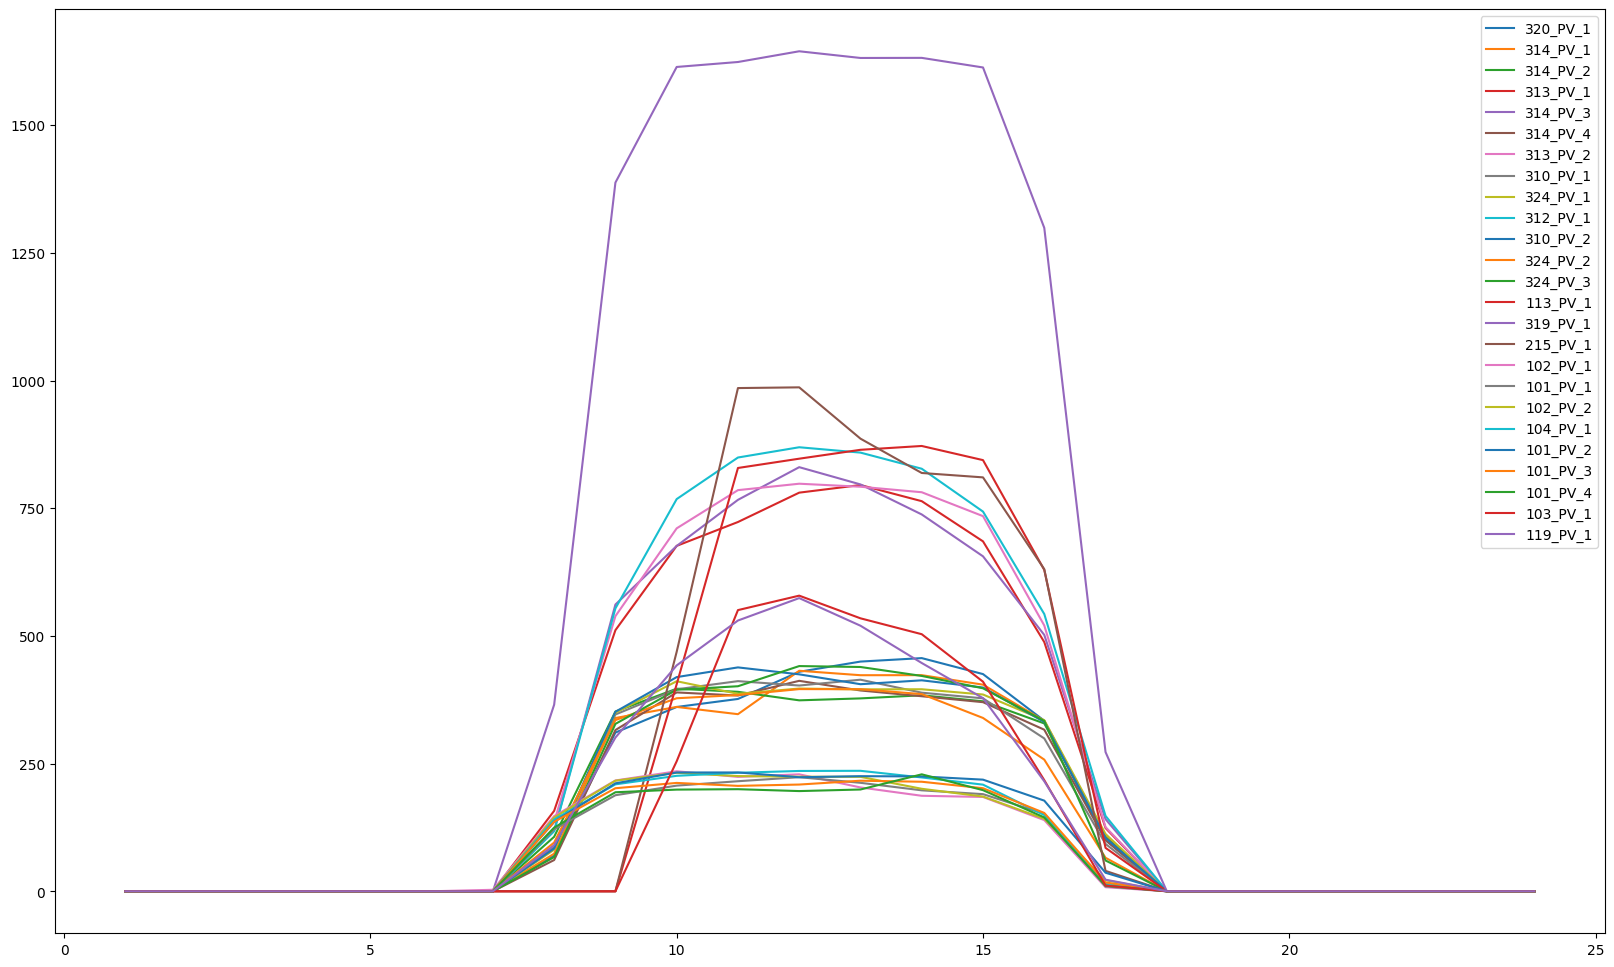

In [412]:
## Ploting data from the second day of january

plt.figure(figsize=(20,12))

for column in summed_pv.columns[1:-1]:
    plt.plot(jan_second['Period'], jan_second[column], label=column)
    
plt.legend()
plt.show()

''' Based on the Visualization below, we can conclude that energy production tends to peak around 10am - 11am in the morning '''

In [437]:
## Find Highest amount of energy produce by each PV Site for each day
max_values1 = jan_first.iloc[:, 1:-1].max()
max_values2 = jan_second.iloc[:, 1:-1].max()
max_values3 = jan_third.iloc[:, 1:-1].max()
max_values4 = jan_fourth.iloc[:, 1:-1].max()
max_values5 = jan_fith.iloc[:, 1:-1].max()
max_values6 = jan_sixth.iloc[:, 1:-1].max()
max_values7 = jan_seventh.iloc[:, 1:-1].max()

## Create a Data Frame for Plotting
MaxDF = pd.DataFrame( max_values1.values, max_values1.index)

max_vals = [max_values2.values, max_values3.values, max_values4.values, max_values5.values, max_values6.values, max_values7.values]

for i , mv in zip(range(1,7), max_vals):
    MaxDF[i] = mv

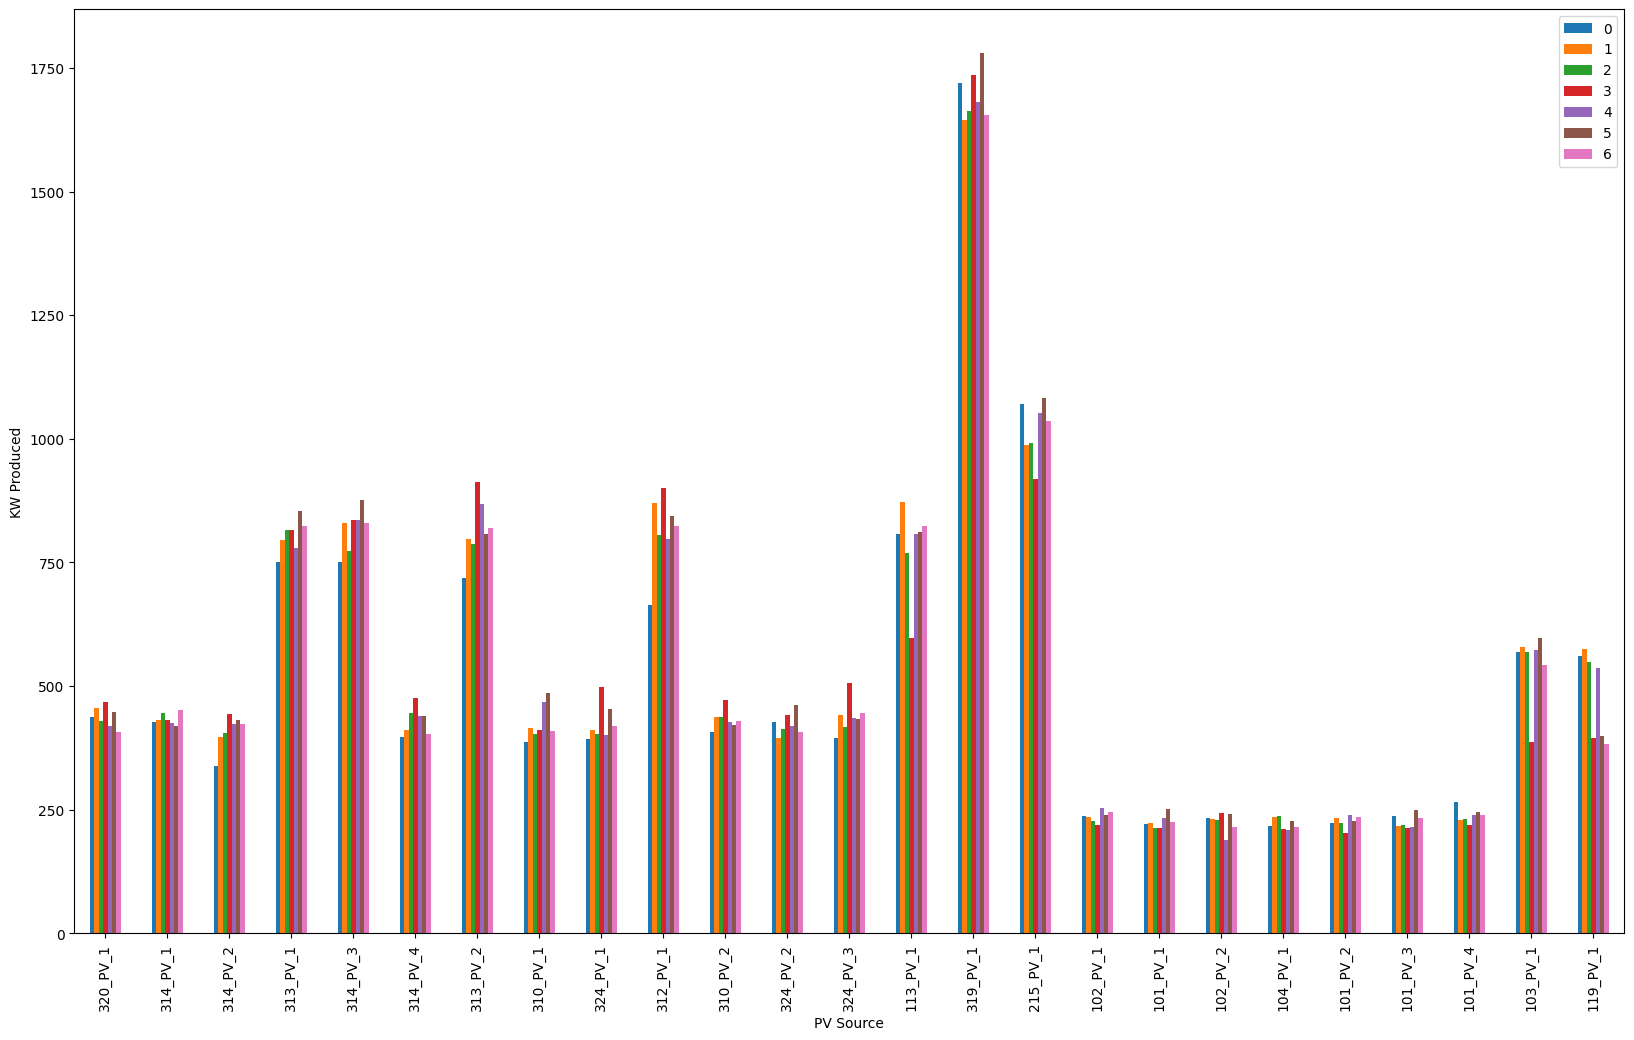

In [470]:
## Plot The data to visualize the result.
MaxDF.plot(kind='bar', figsize=(20,12))
plt.xlabel('PV Source')
plt.ylabel('KW Produced')
plt.legend()
plt.show()

'''As We can see below, the highest amount of energy for the days we analyzed was produced '319_PV_1.' 
we can also see that the highest energy was produced on the 6th day for the days we analyzed'''